In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [3]:
# Importing the dataset
df=pd.read_excel(r"C:\Users\Admin\Amol_Python\Sales_Forecast_Data.xlsx",header=0)

In [4]:
df
print(df.shape)

(230152, 7)


# Check Missing Value

In [5]:
total = df.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum()/df.isnull().count()  * 100).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(32)

,Total,Percent
FIN_YEAR,0,0.0
MONTH,0,0.0
STATE,0,0.0
FG,0,0.0
DISTRICT,0,0.0
COMPANY,0,0.0
VALUE,0,0.0


# Data Types for all variables

In [6]:
print(df.dtypes)

FIN_YEAR     object
MONTH        object
STATE        object
FG           object
DISTRICT     object
COMPANY      object
VALUE       float64
dtype: object


# Let us see how many Object type features are actually Categorical

In [7]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

FIN_YEAR      4
MONTH        12
STATE         5
FG            4
DISTRICT    142
COMPANY      47
dtype: int64

In [8]:
# make the copy of orignal data set
df_rev=pd.DataFrame.copy(df)

# Subsetting the company ABC Manufacturing

In [9]:
Abc_comp = df[df["COMPANY"] == 'ABC Manufacturing'] 
Abc_comp.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
49,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380
50,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250
51,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635
52,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910
53,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110


In [10]:
print(Abc_comp.shape)

(28640, 7)


In [11]:
Abc_comp.columns

Index(['FIN_YEAR', 'MONTH', 'STATE', 'FG', 'DISTRICT', 'COMPANY', 'VALUE'], dtype='object')

<AxesSubplot:xlabel='MONTH', ylabel='count'>

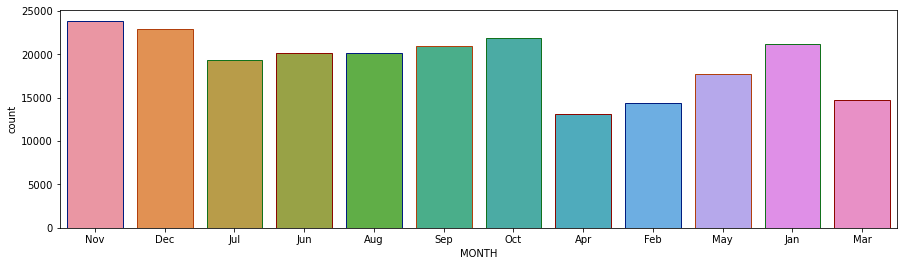

In [13]:
plt.figure(figsize=(15, 4))

sns.countplot(x="MONTH", data=df, edgecolor=sns.color_palette("dark", 6))

# State Wise FG Sell

<AxesSubplot:xlabel='STATE', ylabel='count'>

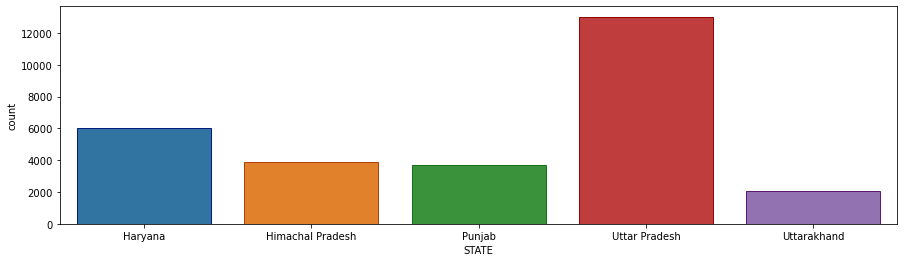

In [14]:
plt.figure(figsize=(15, 4))
sns.countplot(x="STATE", data=Abc_comp, edgecolor=sns.color_palette("dark", 6))

In [15]:
# Importing the Rain dataset 
rain=pd.read_csv(r"C:\Users\Admin\Amol_Python\rainfall data.csv",header=0)
rain.head()

,STATE_UT_NAME,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,Haryana,25.4,23.9,98.6,42.3,28.7,69.6,202.6,124.0,99.4,14.2,2.5,9.8,740.8
1,Himachal Pradesh,136.8,281.5,317.7,145.5,113.9,137.5,453.5,342.6,160.1,37.0,19.0,74.3,2219.2
2,Punjab,39.5,51.4,98.8,54.3,37.5,68.9,206.5,130.5,175.0,15.0,1.5,14.8,893.5
3,Uttarakhand,100.4,162.5,195.7,94.9,90.9,249.5,799.7,569.5,160.5,57.6,2.4,51.5,2535.0
4,Uttar Pradesh,157.3,66.5,153.0,51.2,38.4,237.1,749.3,538.4,239.8,108.0,2.5,32.6,2374.1


# Compairing FG Sell State Wise With Rain Fall In The State

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Haryana'),
  Text(1, 0, 'Himachal Pradesh'),
  Text(2, 0, 'Punjab'),
  Text(3, 0, 'Uttarakhand'),
  Text(4, 0, 'Uttar Pradesh')])

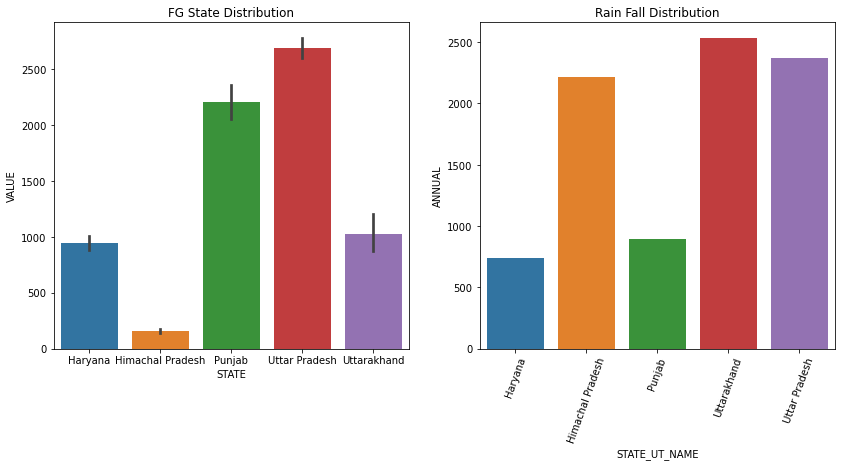

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(x='STATE', y='VALUE',data=Abc_comp, ax=ax[0])
ax[0].set_title("FG State Distribution")

sns.barplot(x='STATE_UT_NAME', y='ANNUAL',data=rain, ax=ax[1])
ax[1].set_title("Rain Fall Distribution")

plt.xticks(rotation=70)

In [19]:
#subsetting the Year According to financial year
Abc_comp.loc[(Abc_comp['MONTH'] == 'Jan') | (Abc_comp['MONTH'] == 'Feb') | (Abc_comp['MONTH'] == 'Mar'),'NEW_DATE']=Abc_comp['FIN_YEAR'].str[-4:]
Abc_comp.loc[(Abc_comp['MONTH'] != 'Jan') | (Abc_comp['MONTH'] != 'Feb') | (Abc_comp['MONTH'] != 'Mar'),'NEW_DATE']=Abc_comp['FIN_YEAR'].str[:4]

In [20]:
#Concatenating Month and New_Year column
Abc_comp["Fin_Date"] = Abc_comp["MONTH"].astype(str) + '-' + Abc_comp["NEW_DATE"]
Abc_comp.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,NEW_DATE,Fin_Date
49,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380,2014,Dec-2014
50,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250,2014,Dec-2014
51,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635,2014,Dec-2014
52,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910,2014,Dec-2014
53,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110,2014,Dec-2014


In [21]:
#converting the datatype from Object into date format
Abc_comp.Fin_Date = pd.to_datetime(Abc_comp.Fin_Date)
print(Abc_comp.dtypes)

FIN_YEAR            object
MONTH               object
STATE               object
FG                  object
DISTRICT            object
COMPANY             object
VALUE              float64
NEW_DATE            object
Fin_Date    datetime64[ns]
dtype: object


In [22]:
#Check Minimum Date and Maximum Date of Fin_Date
Abc_comp['Fin_Date'].min(), Abc_comp['Fin_Date'].max()

(Timestamp('2014-01-01 00:00:00'), Timestamp('2017-12-01 00:00:00'))

<AxesSubplot:xlabel='NEW_DATE', ylabel='count'>

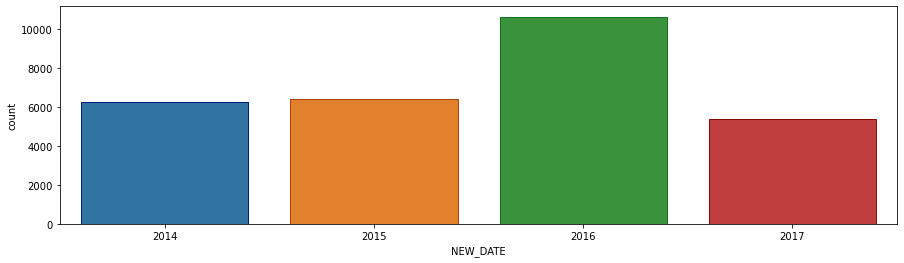

In [23]:
plt.figure(figsize=(15, 4))
sns.countplot(x="NEW_DATE", data=Abc_comp, edgecolor=sns.color_palette("dark", 6))

# Value by Months

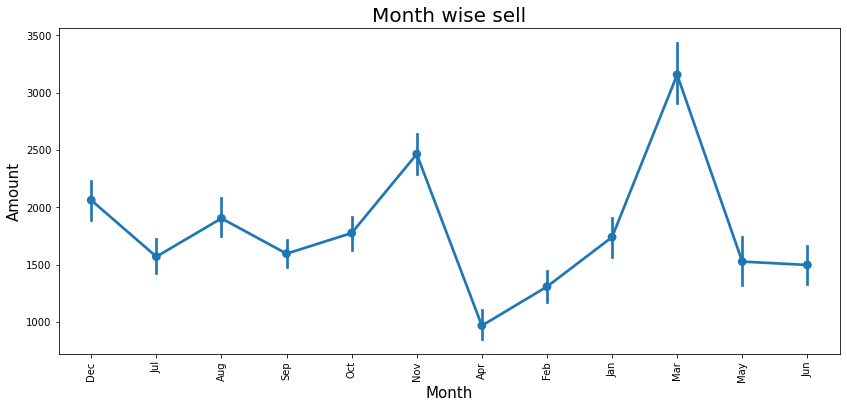

In [24]:
plt.figure(figsize = (14,6))

g = sns.pointplot(x='MONTH', y='VALUE',data=Abc_comp)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Month", fontsize=15)
g.set_ylabel("Amount", fontsize=15)

g.set_title("Month wise sell", fontsize=20)

plt.show()

# Year Wise Sell

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


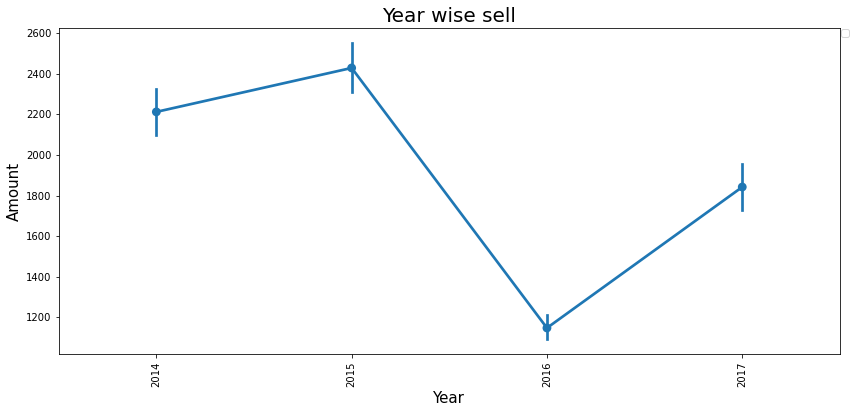

In [25]:
plt.figure(figsize = (14,6))

g = sns.pointplot(x='NEW_DATE', y='VALUE',data=Abc_comp)


g.set_xticklabels(g.get_xticklabels(),rotation=90)

g.set_xlabel("Year", fontsize=15)
g.set_ylabel("Amount", fontsize=15)

g.set_title("Year wise sell", fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.10)

plt.show()

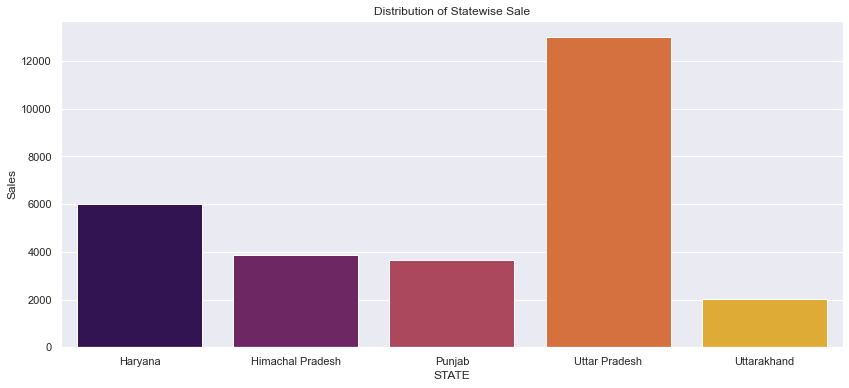

In [26]:
sns.set(rc={'figure.figsize':(14,6)})
sns.countplot(Abc_comp['STATE'],palette='inferno')
plt.xlabel("STATE")
plt.ylabel("Sales")
plt.title("Distribution of Statewise Sale")
plt.show()

# Value Dist

<AxesSubplot:xlabel='VALUE', ylabel='Density'>

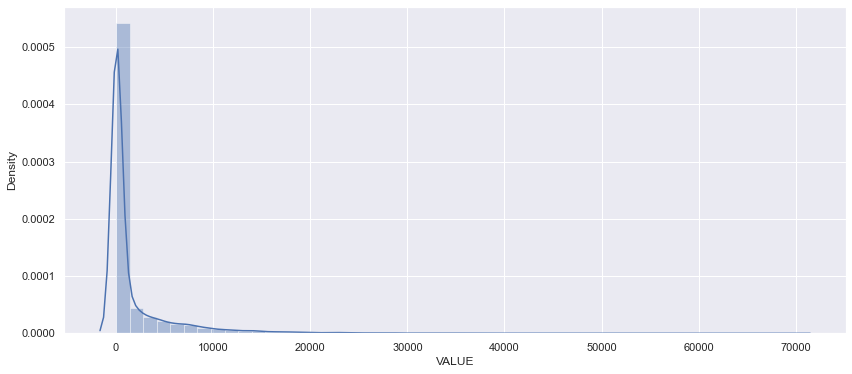

In [27]:
sns.distplot(Abc_comp['VALUE'])

In [28]:
Abc_comp.shape

(28640, 9)

In [29]:
Abc_comp["VALUE"].value_counts()

0.000       11980
40.500        186
81.000        108
67.500        102
13.500         89
            ...  
90.450          1
244.755         1
121.365         1
3725.460        1
633.690         1
Name: VALUE, Length: 10469, dtype: int64

In [30]:
#Checking how much % of 0 value contain in the data 
(11980/28640)*100

41.82960893854749

In [31]:
# Subsetting the Value and Fin_Date column from the data
Abc_comp=Abc_comp[["Fin_Date", "VALUE"]]

In [32]:
#Sorting the Date into cronological order
Abc_comp= Abc_comp.sort_values('Fin_Date',ascending=True)
Abc_comp.isnull().sum()

Fin_Date    0
VALUE       0
dtype: int64

In [33]:
Abc_comp.head(10)

,Fin_Date,VALUE
65737,2014-01-01,745.065
176311,2014-01-01,0.000
7992,2014-01-01,5474.385
7991,2014-01-01,8374.590
7990,2014-01-01,11043.675
7989,2014-01-01,7918.965
7988,2014-01-01,4471.335
176312,2014-01-01,0.000
7987,2014-01-01,13845.060
7985,2014-01-01,12896.415


In [34]:
#checking how many date had repeated days
Abc_comp["Fin_Date"].value_counts()

2016-10-01    988
2016-12-01    972
2016-09-01    968
2016-06-01    940
2016-07-01    920
2016-11-01    920
2016-03-01    904
2016-01-01    884
2016-02-01    876
2016-08-01    844
2016-05-01    840
2017-11-01    560
2016-04-01    560
2017-12-01    556
2014-10-01    552
2014-11-01    548
2017-01-01    548
2017-06-01    548
2015-07-01    544
2015-10-01    544
2015-11-01    540
2017-07-01    540
2015-12-01    540
2014-08-01    540
2014-12-01    540
2015-08-01    540
2014-06-01    540
2017-09-01    536
2017-05-01    536
2015-09-01    536
2014-02-01    536
2015-02-01    536
2014-01-01    536
2015-01-01    532
2015-03-01    532
2015-06-01    532
2014-07-01    528
2017-10-01    528
2014-09-01    524
2017-08-01    524
2015-04-01    512
2015-05-01    512
2014-03-01    492
2014-05-01    488
2017-04-01    480
2014-04-01    444
Name: Fin_Date, dtype: int64

In [35]:
#Grouping the date and Suming the value column who had Repeted days
Abc_comp = Abc_comp.groupby('Fin_Date')['VALUE'].sum().reset_index()
Abc_comp.shape

(46, 2)

In [36]:
Abc_comp["Fin_Date"].value_counts()

2014-01-01    1
2016-11-01    1
2016-02-01    1
2016-03-01    1
2016-04-01    1
2016-05-01    1
2016-06-01    1
2016-07-01    1
2016-08-01    1
2016-09-01    1
2016-10-01    1
2016-12-01    1
2014-02-01    1
2017-01-01    1
2017-04-01    1
2017-05-01    1
2017-06-01    1
2017-07-01    1
2017-08-01    1
2017-09-01    1
2017-10-01    1
2017-11-01    1
2016-01-01    1
2015-12-01    1
2015-11-01    1
2015-10-01    1
2014-03-01    1
2014-04-01    1
2014-05-01    1
2014-06-01    1
2014-07-01    1
2014-08-01    1
2014-09-01    1
2014-10-01    1
2014-11-01    1
2014-12-01    1
2015-01-01    1
2015-02-01    1
2015-03-01    1
2015-04-01    1
2015-05-01    1
2015-06-01    1
2015-07-01    1
2015-08-01    1
2015-09-01    1
2017-12-01    1
Name: Fin_Date, dtype: int64

In [37]:
Abc_comp.head(10)

,Fin_Date,VALUE
0,2014-01-01,1111483.620
1,2014-02-01,948193.695
2,2014-03-01,1844857.215
3,2014-04-01,397456.335
4,2014-05-01,671365.935
5,2014-06-01,912168.945
6,2014-07-01,975706.155
7,2014-08-01,1403217.810
8,2014-09-01,1047744.315
9,2014-10-01,1235733.435


In [38]:
#Converting the Fin_Date Column into Index column
Abc_comp = Abc_comp.set_index('Fin_Date')

In [39]:
Abc_comp.head(10)

,VALUE
Fin_Date,
2014-01-01,1111483.620
2014-02-01,948193.695
2014-03-01,1844857.215
2014-04-01,397456.335
2014-05-01,671365.935
2014-06-01,912168.945
2014-07-01,975706.155
2014-08-01,1403217.810
2014-09-01,1047744.315


In [40]:
#Resampling the Date variable on the Monthly basis of index column
Y = Abc_comp['VALUE'].resample("Q").mean() 

In [41]:
print(Y.shape)
Y

(16,)


Fin_Date
2014-03-31    1301511.510
2014-06-30     660330.405
2014-09-30    1142222.760
2014-12-31    1518338.835
2015-03-31    1463726.385
2015-06-30    1143313.200
2015-09-30    1226935.035
2015-12-31    1347498.990
2016-03-31    1216526.796
2016-06-30     687679.425
2016-09-30    1018743.660
2016-12-31    1138194.504
2017-03-31    1041386.625
2017-06-30     640996.110
2017-09-30     855625.095
2017-12-31    1445181.345
Freq: Q-DEC, Name: VALUE, dtype: float64

# Plotting Graph 

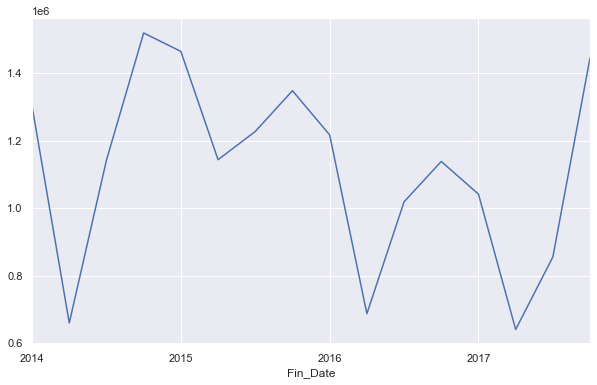

In [42]:
import matplotlib.pyplot as plt
Y.plot(figsize=(10,6))
plt.show()

# Checking Tread and seasonality in the data

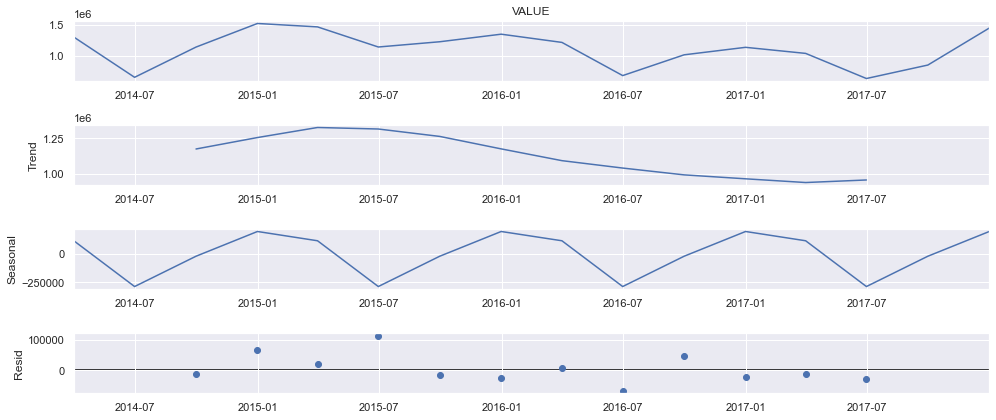

In [43]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(Y)
fig = decomposition.plot()
plt.show()

# Train Data Set

In [44]:
train=Y.loc[:'2016-12-31']
print(train.shape)
train

(12,)


Fin_Date
2014-03-31    1301511.510
2014-06-30     660330.405
2014-09-30    1142222.760
2014-12-31    1518338.835
2015-03-31    1463726.385
2015-06-30    1143313.200
2015-09-30    1226935.035
2015-12-31    1347498.990
2016-03-31    1216526.796
2016-06-30     687679.425
2016-09-30    1018743.660
2016-12-31    1138194.504
Freq: Q-DEC, Name: VALUE, dtype: float64

# Test Data Set

In [45]:
test=Y.loc['2017-01-01':]
print(test.shape)
test

(4,)


Fin_Date
2017-03-31    1041386.625
2017-06-30     640996.110
2017-09-30     855625.095
2017-12-31    1445181.345
Freq: Q-DEC, Name: VALUE, dtype: float64

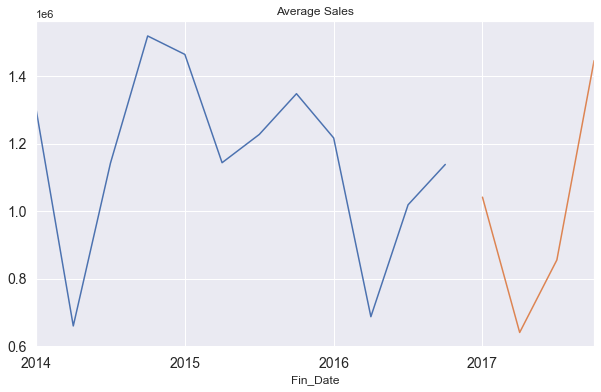

In [46]:
#plotting data
train.plot(figsize=(10,6),title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6),title='Average Sales', fontsize=14)
plt.show()

# Holt_Linear

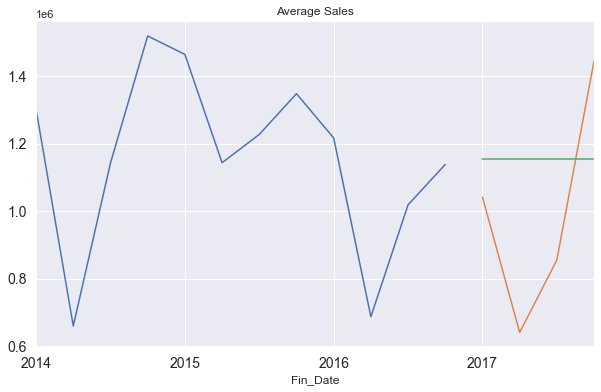

In [47]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.01)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [48]:
fit1.aic

302.8447959698349

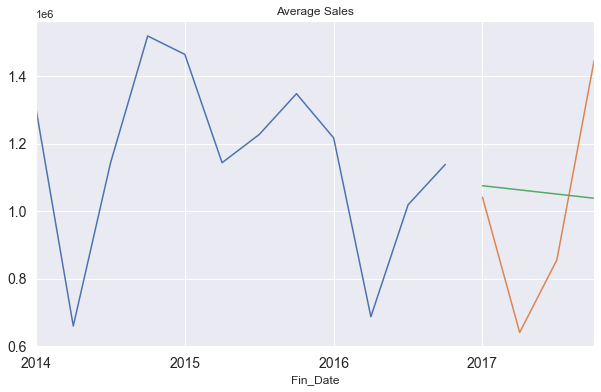

In [49]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()

fit1 = Holt(train).fit(smoothing_level=0.01,smoothing_slope = 0.01)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [50]:
fit1.aic

306.5077250212345

In [51]:
Holt_df['Holt_linear']

2017-03-31    1.075238e+06
2017-06-30    1.062891e+06
2017-09-30    1.050544e+06
2017-12-31    1.038197e+06
Freq: Q-DEC, dtype: float64

# Holt_Winter

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


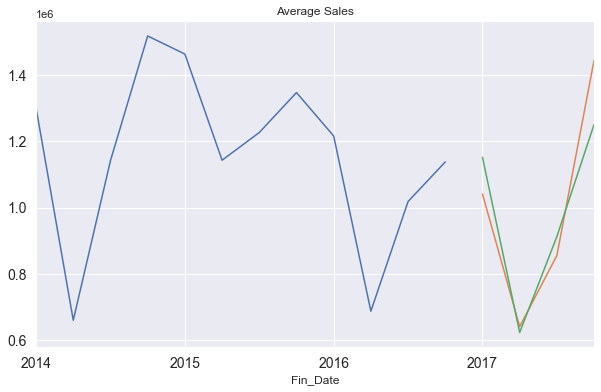

In [52]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonal_period=gamma
fit1 = ExponentialSmoothing(train, seasonal_periods=4,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [53]:
fit1.aic

308.84077674736244

In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Holt_Winter_df['Holt_Winter']))
print(rmse)

115557.10672596747


In [55]:
Holt_Winter_df['Holt_Winter']

2017-03-31    1.152115e+06
2017-06-30    6.234570e+05
2017-09-30    9.128969e+05
2017-12-31    1.251364e+06
Freq: Q-DEC, dtype: float64

# Predicting for Quarter

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


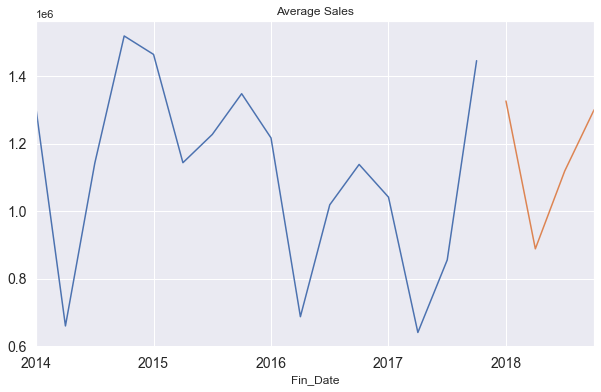

In [56]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonal_period=gamma
fit1 = ExponentialSmoothing(Y, seasonal_periods=4,
                            trend='add',
                            seasonal='add').fit()
#Y_prediction = fit1.predict(start=pd.to_datretime('2017-01-31'))
Y_Predictions = fit1.forecast(steps=4)

Y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_Predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [57]:
Y_Predictions

2018-03-31    1.325903e+06
2018-06-30    8.884948e+05
2018-09-30    1.118612e+06
2018-12-31    1.299782e+06
Freq: Q-DEC, dtype: float64

# Using ARIMA and SARIMAX

In [58]:
import pmdarima as pm

In [59]:
model = pm.auto_arima(Y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=2, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=4, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,2,0)[4]             : AIC=206.391, Time=2.83 sec
 ARIMA(1,1,0)(1,2,0)[4]             : AIC=203.639, Time=0.79 sec
 ARIMA(0,1,1)(0,2,1)[4]             : AIC=198.713, Time=0.18 sec
 ARIMA(0,1,1)(0,2,0)[4]             : AIC=206.099, Time=0.07 sec
 ARIMA(0,1,1)(1,2,1)[4]             : AIC=200.103, Time=0.21 sec
 ARIMA(0,1,1)(0,2,2)[4]             : AIC=199.484, Time=1.16 sec
 ARIMA(0,1,1)(1,2,0)[4]             : AIC=205.079, Time=0.14 sec
 ARIMA(0,1,1)(1,2,2)[4]             : AIC=201.481, Time=0.78 sec
 ARIMA(0,1,0)(0,2,1)[4]             : AIC=199.658, Time=0.08 sec
 ARIMA(1,1,1)(0,2,1)[4]             : AIC=199.729, Time=0.29 sec
 ARIMA(0,1,2)(0,2,1)[4]             : AIC=202.918, Time=0.22 sec
 ARIMA(1,1,0)(0,2,1)[4]             : AIC=200.538, Time=0.12 sec
 ARIMA(1,1,2)(0,2,1)[4]             : AIC=205.095, Time=0.38 sec
 ARIMA(0,1,1)(0,2,1)[4] intercept   : AIC=206.244, Time=0.23 sec

Best model:  ARIMA(0,1,1)(0,2,1)[4]          


In [60]:
model.aic()

198.71263337713327

In [61]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(Y,order=(0,1,1))
model_fit = model.fit()

In [62]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  VALUE   No. Observations:                   16
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -211.280
Date:                Fri, 25 Nov 2022   AIC                            426.561
Time:                        20:32:49   BIC                            427.977
Sample:                    03-31-2014   HQIC                           426.546
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4050      0.273     -1.482      0.138      -0.941       0.131
sigma2      9.549e+10    6.1e-13   1.57e+23      0.000    9.55e+10    9.55e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 0.13
Prob(Q):                              0.56   Prob(JB):                         0.94
Heteroskedasticity (H):               0.98   Skew:                             0.03
Prob(H) (two-sided):                  0.98   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

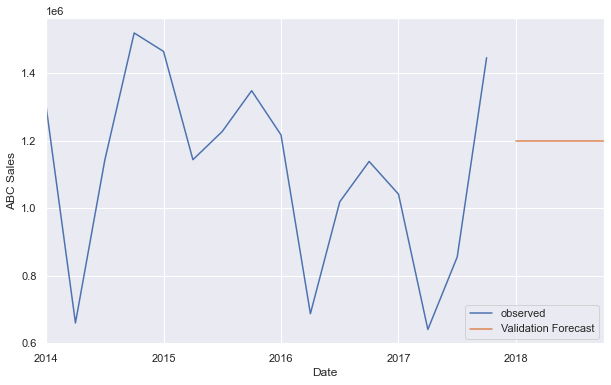

In [63]:
pred =model_fit.get_forecast(steps=4)

plt.figure(figsize=(10,6))
ax = Y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('ABC Sales')
plt.legend()
plt.show()

In [64]:
pred.predicted_mean

2018-03-31    1.198626e+06
2018-06-30    1.198626e+06
2018-09-30    1.198626e+06
2018-12-31    1.198626e+06
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(Y,order=(0,1,1),seasonal_order=(0,2,1,4)).fit()

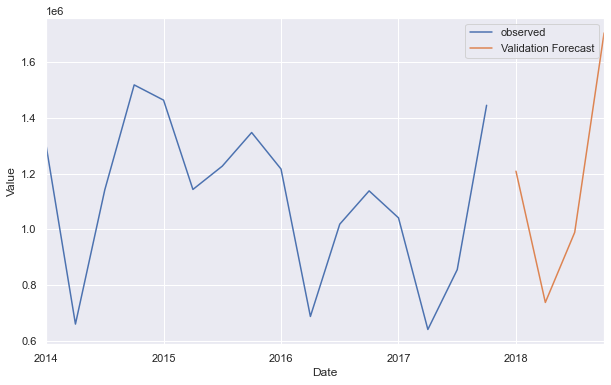

In [66]:
pred =model.get_forecast(steps=4)

plt.figure(figsize=(10,6))
ax = Y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
plt.legend()
plt.show()

In [67]:
pred.predicted_mean

2018-03-31    1.208790e+06
2018-06-30    7.379355e+05
2018-09-30    9.893460e+05
2018-12-31    1.704630e+06
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [68]:
pred.predicted_mean.to_excel("TimeseriesKPMG_Sales Forcast.xlsx",index=True)